<a href="https://colab.research.google.com/github/jessamcs/Project-2/blob/main/Project2_Part2_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project2 Part2 (NEW)** - for travel agency & insurance

To meet the requirements for this week you must have:

- deleted unnecessary columns

- deleted duplicate rows

- identified and addressed missing values 

- identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

- produced univariate visuals for the target and all features

- identified outliers

- produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

- clearly commented all of your cleaning steps and described any decisions you made 

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from pandas.plotting import lag_plot

In [ ]:
df=pd.read_csv('/content/travel insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
#delete duplicate rows
duplicate = df[df.duplicated()]
print(duplicate)

      Agency    Agency Type  ... Gender  Age
287      EPX  Travel Agency  ...    NaN   36
302      EPX  Travel Agency  ...    NaN   36
356      EPX  Travel Agency  ...    NaN   36
404      CCR  Travel Agency  ...      M  118
450      EPX  Travel Agency  ...    NaN   36
...      ...            ...  ...    ...  ...
63304    EPX  Travel Agency  ...    NaN   36
63309    SSI       Airlines  ...    NaN   48
63316    JZI       Airlines  ...      F   25
63317    JZI       Airlines  ...      F   25
63324    JZI       Airlines  ...      M   63

[8042 rows x 11 columns]


In [ ]:
#identified and addressed missing values
missing_item_weight_filter = df['Gender'].isnull()
missing_item_weight = df.loc[missing_item_weight_filter, :]
missing_item_weight

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.50,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.60,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.80,11.88,NaN,41
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.60,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.90,65.34,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...
63309,SSI,Airlines,Online,Ticket Protector,No,41,SINGAPORE,11.58,3.25,NaN,48
63310,SSI,Airlines,Online,Ticket Protector,No,69,SINGAPORE,12.87,3.61,NaN,48
63311,SSI,Airlines,Online,Ticket Protector,No,96,SINGAPORE,5.92,1.66,NaN,48
63312,SSI,Airlines,Online,Ticket Protector,No,61,SINGAPORE,6.56,1.84,NaN,48


In [ ]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

In [ ]:
# deleted unnecessary columns
del df['Gender']


#Deleted Gender column as it is not the part of the target project

In [ ]:
#produced univariate visuals for the target and all features
# Create a univariate visuals for the features

# Perform Test-Train-Split
X = df.drop(columns = ['Duration'])
y = df['Duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



#NOTE:
#This is to figure out the net sales of each agency

In [ ]:
# Create categorical and numeric selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Object initialization
median_imputer = SimpleImputer(strategy = 'median')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Create pipeline for numeric columns
num_pipe = make_pipeline(median_imputer, scaler)

# Create pipeline for categorical columns
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# Create column transformers
column_transformer = make_column_transformer(num_tuple, cat_tuple)
column_transformer.fit(X_train)

# Transform train and test set
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

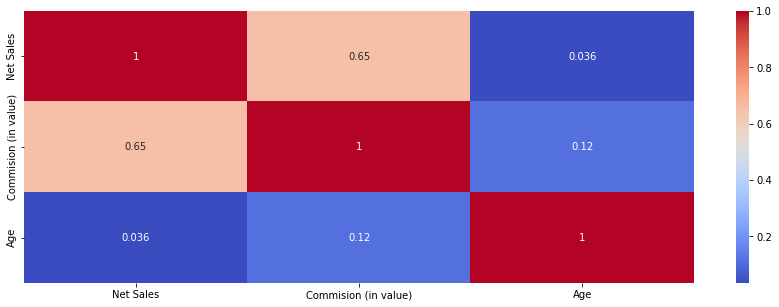

In [ ]:
# Create correlation heatmap
fig, ax = plt.subplots(figsize=(15, 5))
corr = X_train.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

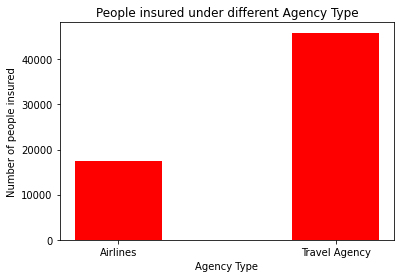

In [ ]:
df=df.groupby(by=['Agency Type']).size().reset_index(name="counts")
plt.bar(df['Agency Type'], df['counts'], color ='red',width = 0.4)
plt.xlabel("Agency Type")
plt.ylabel("Number of people insured")
plt.title("People insured under different Agency Type")
plt.show()

# NOTE: To figure out the graph of Insured travellers where they get their travel insurance.
# Range of 18,000-20,000 people who get their insurance via Airlines. Travellers who availed insurance
# via Airline (or Direct) are usually do their itineraries.
# Range of above 40,000 people via travel agency 

# NOTE: To figure out the graph of Insured travellers where they get their travel insurance.
# Range of 18,000-20,000 people who get their insurance via Airlines. Travellers who availed insurance via Airline (or Direct) are usually do their itineraries.
# Range of above 40,000 insured people via travel agency get their insurance. Travellers who usually avails 